<a href="https://colab.research.google.com/github/kabi239/image-classication-/blob/main/miniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing some libs
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical


In [3]:
# loading data
from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
#first image in form of array
index=0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

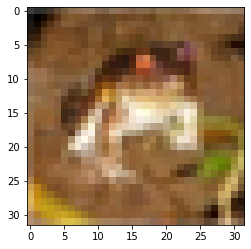

In [7]:
#first image
img =plt.imshow(x_train[index])

In [8]:
#img label
print('The image lable is:',y_train[index])

The image lable is: [6]


In [9]:
#classification of image
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


In [10]:
#10th image in form of array
index=10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

In [11]:
#img label
print('The image lable is:',y_train[index])

The image lable is: [4]


In [12]:
print('The image class is: ', classification[y_train[index][0]])

The image class is:  deer


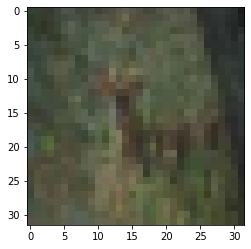

In [13]:
#10th image
img =plt.imshow(x_train[index])

In [14]:
#convering label into set of 10 no.s to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [15]:
#printing the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [16]:
#new label of image deer
print('The one hot lable is: ',y_train_one_hot[index])

The one hot lable is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [17]:
#normalizing pixels -- values(0-1)
x_train =x_train/255
x_test =x_test/255


In [18]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [19]:
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
# comiling the model
cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
hist=cnn.fit(x_train, y_train_one_hot, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 80s 38ms/step - loss: 1.6839 - accuracy: 0.3836
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0902 - accuracy: 0.6171
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9427 - accuracy: 0.6740
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8542 - accuracy: 0.7043
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7925 - accuracy: 0.7248
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7226 - accuracy: 0.7496
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6698 - accuracy: 0.7661
Epoch 8/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6204 - accuracy: 0.7817
Epoch 9/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.5814 - accuracy: 0.7984
Epoch 10/10
1563/1563 [==============================] - 57s 36m

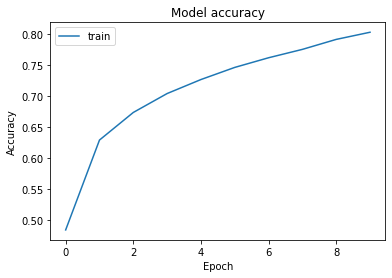

In [22]:
#visualizing model
plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

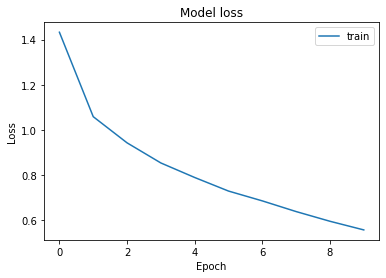

In [23]:
#visualizing model loss
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper right')
plt.show()

In [24]:
#test model
from google.colab import files
uploaded = files.upload()

Saving download (1).jfif to download (1).jfif


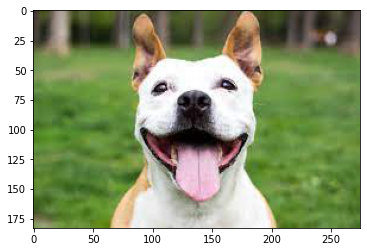

In [25]:
#show image
new_img = plt.imread('download (1).jfif')
img= plt.imshow(new_img)

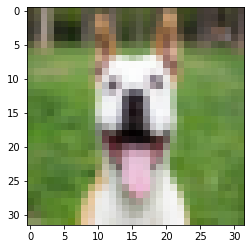

In [26]:
from skimage.transform import resize
resized_img = resize(new_img,(32,32,3))
img =plt.imshow(resized_img)

In [27]:
#prediction
pre = cnn.predict(np.array([resized_img]))
pre

array([[3.9127382e-05, 8.4501558e-08, 4.9620692e-02, 3.0431228e-03,
        2.5820639e-03, 9.3562865e-01, 3.4040020e-06, 9.0827215e-03,
        7.4554301e-08, 3.2490572e-08]], dtype=float32)

In [28]:
#sort Predictions
list_index =[0,1,2,3,4,5,6,7,8,9]
x=pre
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      t =list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=t
#show sorted labels
print(list_index)      


[5, 2, 7, 3, 4, 0, 6, 1, 8, 9]


In [29]:
#print the firt 5 pridictions
for i in range(5):
  print(classification[list_index[i]],':',round(pre[0][list_index[i]]*100,2), '%')

dog : 93.56 %
bird : 4.96 %
horse : 0.91 %
cat : 0.3 %
deer : 0.26 %
